# Salary Classifier

The objective of this project was to predict whether given individuals in a dataset make over or under 50,000 dollars.

The dataset used was the 'adult' dataset from the UC Irvine repository.
All preprocessing was done within the notebook shown below.

#### Import Libraries

In [1228]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#### Fetch dataset

In [1230]:
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
df = X
df.insert(14,'50K', y)
#Replace the target variable from <50K and >50K to 0's and 1's
df.replace(to_replace = '<=50K',value = 0, inplace = True)
df.replace(to_replace = '<=50K.',value = 0, inplace = True)
df.replace(to_replace = '>50K.',value = 1,inplace = True)
df.replace(to_replace = '>50K',value = 1,inplace = True)

/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_57349/3892937393.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace = '>50K',value = 1,inplace = True)


In [1232]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '50K'],
      dtype='object')

#### Find which columns have null values, if any

In [1234]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
50K                 0
dtype: int64

#### Drop any rows with null values for ease of use.

In [1236]:
df.dropna(inplace = True)

#### Describe the data

In [1238]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,50K
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000,47621.000000
mean,38.640684,1.897271e+05,10.090821,1091.137649,87.853489,40.600050,0.242351
std,13.558961,1.055695e+05,2.568320,7487.228336,404.010612,12.260345,0.428510
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175840e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.782820e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.377200e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### Pairplot to try and find relationships in the data

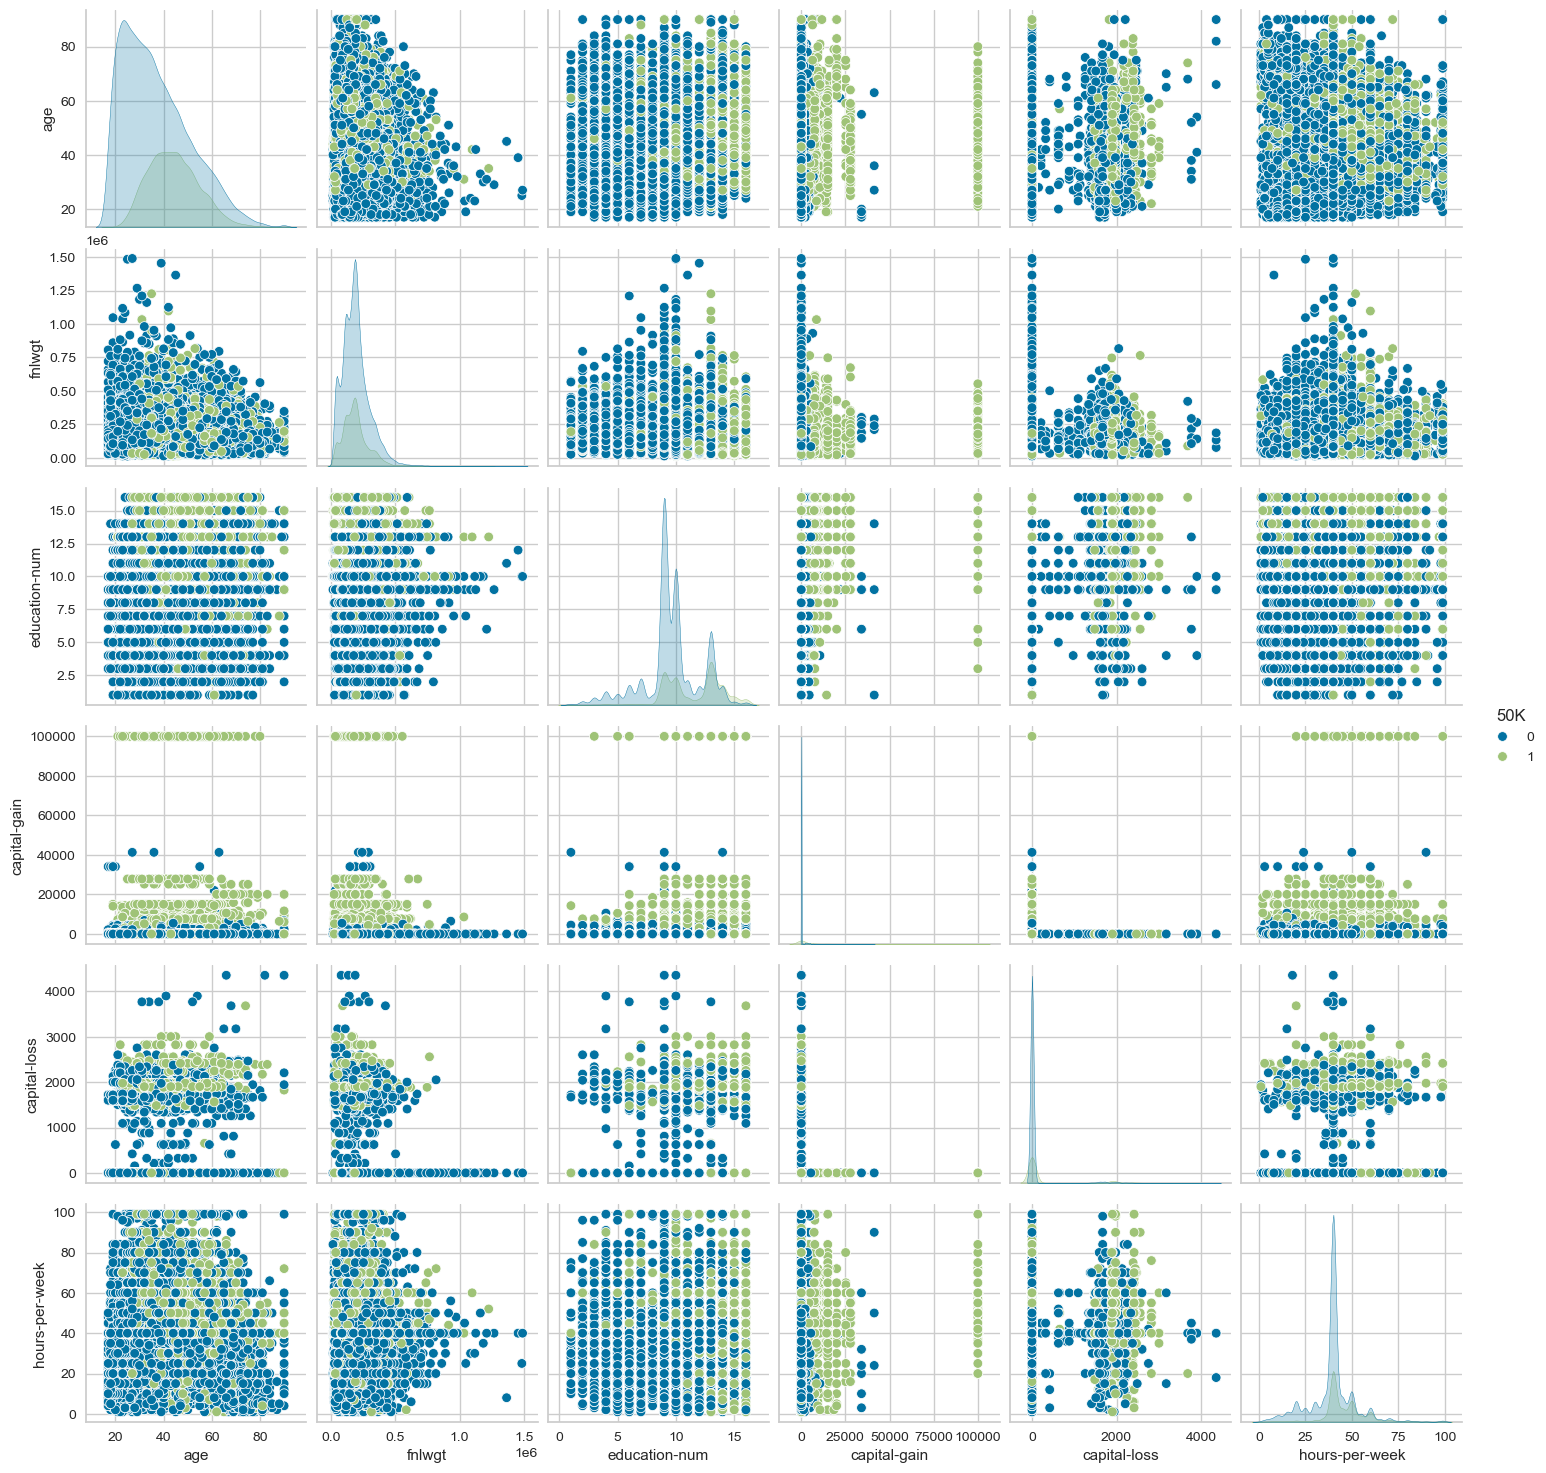

In [1219]:
sns.pairplot(df, hue = '50K')

#### Create our X column
Here I created X_logistic, which includes all of the columns I wished to include in the following models.

In [1240]:
X_logistic = df[['age', 'marital-status','race','sex', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['50K']

Marital status, race, and sex were turned into numerical values below in order to be used in the models.

In [1243]:
#create dummy variables
X_logistic['marital-status'].replace(to_replace = 'Married-civ-spouse', value = 1,inplace = True)
X_logistic['marital-status'].replace(to_replace = 'Married-AF-spouse', value = 1,inplace = True)
X_logistic['marital-status'].replace(to_replace = 'Married-spouse-absent', value = 1,inplace = True)
X_logistic['marital-status'].replace(to_replace = 'Widowed', value = 1,inplace = True)
X_logistic['marital-status'].replace(to_replace = 'Divorced', value = 2,inplace = True)
X_logistic['marital-status'].replace(to_replace = 'Separated', value = 2,inplace = True)
X_logistic['marital-status'].replace(to_replace = 'Never-married', value = 0,inplace = True)

X_logistic['race'].replace(to_replace = 'White', value = 0,inplace = True)
X_logistic['race'].replace(to_replace = 'Black', value = 1,inplace = True)
X_logistic['race'].replace(to_replace = 'Asian-Pac-Islander', value = 2,inplace = True)
X_logistic['race'].replace(to_replace = 'Amer-Indian-Eskimo', value = 3,inplace = True)
X_logistic['race'].replace(to_replace = 'Other', value = 4,inplace = True)

X_logistic['sex'].replace(to_replace = 'Male', value = 1,inplace = True)
X_logistic['sex'].replace(to_replace = 'Female', value = 0,inplace = True)

X_logistic

/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_57349/1078994597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_logistic['marital-status'].replace(to_replace = 'Married-civ-spouse', value = 1,inplace = True)
/var/folders/6p/v9rm9dqj4xq8113by2w3q15m0000gn/T/ipykernel_57349/1078994597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,age,marital-status,race,sex,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,0,0,1,77516,13,2174,0,40
1,50,1,0,1,83311,13,0,0,13
2,38,2,0,1,215646,9,0,0,40
3,53,1,1,1,234721,7,0,0,40
4,28,1,1,0,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...
48836,33,0,0,1,245211,13,0,0,40
48837,39,2,0,0,215419,13,0,0,36
48839,38,1,0,1,374983,13,0,0,50
48840,44,2,2,1,83891,13,5455,0,40


## Logistic Regression

In [1245]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.33, random_state=42)
lm = LogisticRegression()

lm.fit(X_train, y_train)
pd.DataFrame(lm.coef_, columns = X_logistic.columns)

lr_predictions = lm.predict(X_test)

CR_Logistic = classification_report(y_test, lr_predictions)
CM_Logistic = confusion_matrix(y_test, lr_predictions)

print(CM_Logistic)
print(CR_Logistic)

[[11486   322]
 [ 3046   861]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     11808
           1       0.73      0.22      0.34      3907

    accuracy                           0.79     15715
   macro avg       0.76      0.60      0.61     15715
weighted avg       0.77      0.79      0.74     15715



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [1248]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dt_predictions = dtree.predict(X_test)

CM_DTree = confusion_matrix(y_test, dt_predictions)
CR_DTree = classification_report(y_test, dt_predictions)
print(CM_DTree)
print(CR_DTree)

[[10253  1555]
 [ 1590  2317]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11808
           1       0.60      0.59      0.60      3907

    accuracy                           0.80     15715
   macro avg       0.73      0.73      0.73     15715
weighted avg       0.80      0.80      0.80     15715



## Random Forest Classifier

In [1250]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 250)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

CM_RF = confusion_matrix(y_test, rfcpred)
CR_RF = classification_report(y_test, rfcpred)
print(CM_RF)
print(CR_RF)

[[10864   944]
 [ 1648  2259]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     11808
           1       0.71      0.58      0.64      3907

    accuracy                           0.84     15715
   macro avg       0.79      0.75      0.76     15715
weighted avg       0.83      0.84      0.83     15715



## Support Vector Machines

In [1252]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
svc_predictions = model.predict(X_test)

CM_SVC = confusion_matrix(y_test, svc_predictions)
CR_SVC = classification_report(y_test, svc_predictions)
print(CM_SVC)
print(CR_SVC)

[[11782    26]
 [ 3303   604]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     11808
           1       0.96      0.15      0.27      3907

    accuracy                           0.79     15715
   macro avg       0.87      0.58      0.57     15715
weighted avg       0.83      0.79      0.72     15715



In [1254]:
#Search for best parameters with gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.761 total time=  53.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.761 total time=  53.7s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.761 total time=  52.4s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.761 total time=  54.1s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.761 total time=  52.4s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.761 total time=  53.9s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.761 total time=  51.1s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.761 total time=  52.3s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.761 total time=  56.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.761 total time=  52.8s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.761 total time=  48.2s
[CV 2/5] END .................C=0.1, gamma=0.01;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             verbose=3)

In [1256]:
#Test Support Vector Model with Best Parameters and compare to the original 
grid.best_params_
grid.best_estimator_
grid_predict = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predict))
print('\n')
print(classification_report(y_test, grid_predict))

[[11795    13]
 [ 3890    17]]


              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11808
           1       0.57      0.00      0.01      3907

    accuracy                           0.75     15715
   macro avg       0.66      0.50      0.43     15715
weighted avg       0.71      0.75      0.65     15715



The support vector model with best parameters was greatly inferior to the baseline model. Weighted avg accuracy was 0.75 in the best parameters model compared to 0.79 for the original, and precision was also much lower. Baseline model will be used instead.

## K-Nearest Neighbors

In [1264]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
#Scale the data
from sklearn.preprocessing import StandardScaler


#### For k-Nearest Neighbors, data must be scaled.

In [1267]:
scaler = StandardScaler()
scaler.fit(X_logistic)
#Transform the data to center and scale it
scaled_data = scaler.transform(X_logistic)
#Create dataframe of the scaled data
scaled = pd.DataFrame(scaled_data, columns = X_logistic.columns)
scaled

,age,marital-status,race,sex,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.026501,-1.227809,-0.349860,0.700779,-1.062924,1.132729,0.144629,-0.217456,-0.048943
1,0.837781,0.230683,-0.349860,0.700779,-1.008031,1.132729,-0.145735,-0.217456,-2.251188
2,-0.047252,1.689176,-0.349860,0.700779,0.245517,-0.424726,-0.145735,-0.217456,-0.048943
3,1.059039,0.230683,1.255062,0.700779,0.426206,-1.203454,-0.145735,-0.217456,-0.048943
4,-0.784780,0.230683,1.255062,-1.426982,1.408394,1.132729,-0.145735,-0.217456,-0.048943
...,...,...,...,...,...,...,...,...,...
47616,-0.416016,-1.227809,-0.349860,0.700779,0.525573,1.132729,-0.145735,-0.217456,-0.048943
47617,0.026501,1.689176,-0.349860,-1.426982,0.243367,1.132729,-0.145735,-0.217456,-0.375201
47618,-0.047252,0.230683,-0.349860,0.700779,1.754843,1.132729,-0.145735,-0.217456,0.766703
47619,0.395264,1.689176,2.859984,0.700779,-1.002537,1.132729,0.582847,-0.217456,-0.048943


In [1269]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.33, random_state=42)

In [1271]:
#K Neighbors Classifier
#Elbow Method for Optimal Error Rate
errorRate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    errorRate.append(np.mean(pred_i != y_test))

#### Below is a plot of the error rate to determine the optimal k-value

Text(0, 0.5, 'Error Rate')

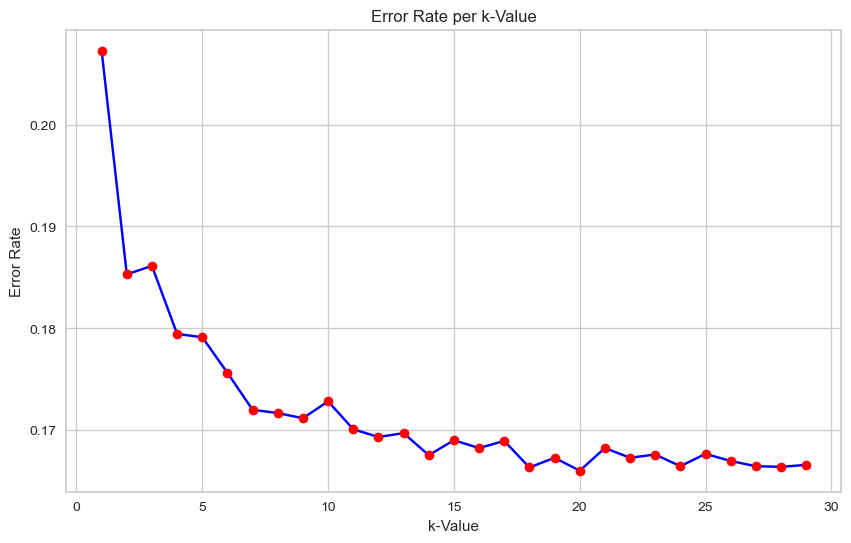

In [1274]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), errorRate, color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.title('Error Rate per k-Value')
plt.xlabel('k-Value')
plt.ylabel('Error Rate')

The optimal k-Value for this dataset is 18.
Now, I will print the confusion matrix and classification report for this dataset.

In [1277]:
knn = KNeighborsClassifier(n_neighbors= 18)
knn.fit(X_train, y_train)
pred18 = knn.predict(X_test)
CM_KNN = confusion_matrix(y_test, pred18)
CR_KNN = classification_report(y_test, pred18)
print(CM_KNN)
print(CR_KNN)

[[11099   709]
 [ 1905  2002]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11808
           1       0.74      0.51      0.61      3907

    accuracy                           0.83     15715
   macro avg       0.80      0.73      0.75     15715
weighted avg       0.82      0.83      0.82     15715



# Assess All Models

#### Logistic Regression

In [1148]:
print(CM_Logistic)
print(CR_Logistic)

[[11486   322]
 [ 3046   861]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     11808
           1       0.73      0.22      0.34      3907

    accuracy                           0.79     15715
   macro avg       0.76      0.60      0.61     15715
weighted avg       0.77      0.79      0.74     15715



#### Decision Tree

In [1151]:
print(CM_DTree)
print(CR_DTree)

[[10268  1540]
 [ 1585  2322]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11808
           1       0.60      0.59      0.60      3907

    accuracy                           0.80     15715
   macro avg       0.73      0.73      0.73     15715
weighted avg       0.80      0.80      0.80     15715



#### Random Forest

In [1154]:
print(CM_RF)
print(CR_RF)

[[10902   906]
 [ 1632  2275]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11808
           1       0.72      0.58      0.64      3907

    accuracy                           0.84     15715
   macro avg       0.79      0.75      0.77     15715
weighted avg       0.83      0.84      0.83     15715



#### Support Vector Machines

In [1157]:
print(CM_SVC)
print(CR_SVC)

[[11782    26]
 [ 3303   604]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     11808
           1       0.96      0.15      0.27      3907

    accuracy                           0.79     15715
   macro avg       0.87      0.58      0.57     15715
weighted avg       0.83      0.79      0.72     15715



#### k-Nearest Neighbors (n = 16)

In [1160]:
print(CM_KNN)
print(CR_KNN)

[[11099   709]
 [ 1905  2002]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11808
           1       0.74      0.51      0.61      3907

    accuracy                           0.83     15715
   macro avg       0.80      0.73      0.75     15715
weighted avg       0.82      0.83      0.82     15715



#### Weighted Avg Precision & Recall

<Axes: xlabel='Precision', ylabel='Recall'>

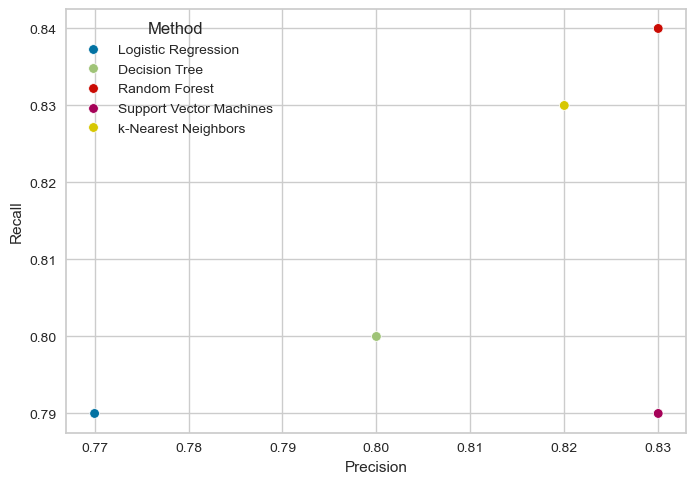

In [1163]:
WtPrecLogistic = float(CR_Logistic[291:295])
WtRecLogistic = float(CR_Logistic[301:305])
F1Logistic = float(CR_Logistic[311:315])
WtPrecDTree = float(CR_DTree[291:295])
WtRecDTree = float(CR_DTree[301:305])
F1DTree = float(CR_DTree[311:315])
WtPrecRF = float(CR_RF[291:295])
WtRecRF = float(CR_RF[301:305])
F1RF = float(CR_RF[311:315])
WtPrecSVC = float(CR_SVC[291:295])
WtRecSVC = float(CR_SVC[301:305])
F1SVC = float(CR_SVC[311:315])
WtPrecKNN = float(CR_KNN[291:295])
WtRecKNN = float(CR_KNN[301:305])
F1KNN = float(CR_KNN[311:315])

MethodPRF1 = pd.DataFrame([['Logistic Regression', WtPrecLogistic, WtRecLogistic,F1Logistic],
             ['Decision Tree', WtPrecDTree, WtRecDTree, F1DTree],
             ['Random Forest', WtPrecRF, WtRecRF,F1RF],
             ['Support Vector Machines', WtPrecSVC, WtRecSVC, F1SVC],
             ['k-Nearest Neighbors', WtPrecKNN, WtRecKNN, F1KNN]],
             columns = ['Method', 'Precision', 'Recall', 'F-1 Score'])


sns.scatterplot(data = MethodPRF1, x = 'Precision', y = 'Recall', hue = 'Method')

After looking at the graph generated above, the random forest model had the highest precision and recall of any of the models. It also had the highest F-1 score of any model, with k-Nearest Neighbors closely trailing behind.

#### Assessing the Predictions

In [ ]:
Logistic_TP, Logistic_FN, Logistic_FP, Logistic_TN = CM_Logistic[0][0], CM_Logistic[0][1], CM_Logistic[1][0], CM_Logistic[1][1]
DTree_TP, DTree_FN, DTree_FP, DTree_TN = CM_DTree[0][0], CM_DTree[0][1], CM_DTree[1][0], CM_DTree[1][1]
RF_TP, RF_FN, RF_FP, RF_TN = CM_RF[0][0], CM_RF[0][1], CM_RF[1][0], CM_RF[1][1]
SVC_TP, SVC_FN, SVC_FP, SVC_TN = CM_SVC[0][0], CM_SVC[0][1], CM_SVC[1][0], CM_SVC[1][1]
KNN_TP, KNN_FN, KNN_FP, KNN_TN = CM_KNN[0][0], CM_KNN[0][1], CM_KNN[1][0], CM_KNN[1][1]

MethodPreds = pd.DataFrame([['Logistic Regression', Logistic_TP, Logistic_FN, Logistic_TN, Logistic_FP],
              ['Decision Tree', DTree_TP, DTree_FN, DTree_TN, DTree_FP],
              ['Random Forest', RF_TP, RF_FN, RF_TN, RF_FP],
              ['Support Vector Machines', SVC_TP, SVC_FN, SVC_TN, SVC_FP],
              ['k-Nearest Neighbors', KNN_TP, KNN_FN, KNN_TN, KNN_FP]],
             columns = ['Method', 'Pred. <50K (Correct)', 'Pred. >50K (Incorrect)', 'Pred. >50K (Correct)', 'Pred. <50K(Incorrect)'])

In [1171]:
Results = pd.merge(MethodPRF1, MethodPreds, on = 'Method')
Results

,Method,Precision,Recall,F-1 Score,Pred. <50K (Correct),Pred. >50K (Incorrect),Pred. >50K (Correct),Pred. <50K(Incorrect)
0,Logistic Regression,0.77,0.79,0.74,11486,322,861,3046
1,Decision Tree,0.80,0.80,0.80,10268,1540,2322,1585
2,Random Forest,0.83,0.84,0.83,10902,906,2275,1632
3,Support Vector Machines,0.83,0.79,0.72,11782,26,604,3303
4,k-Nearest Neighbors,0.82,0.83,0.82,11099,709,2002,1905


Looking at the predicting, the support vector machine was the best at identifying individuals making < 50K.
However, it was very bad at identifying individuals making > 50K.

The random forest model had the best balance of correctly predicting those making < 50K and those making > 50K.
Therefore, the random forest model was the best choice for this dataset.

Of the 15,715 individuals in the y_test portion of the dataset, there were 11,808 individuals that earned less than 50K, and 3,907 that earned over 50K.
The random forest model correctly labeled 10,902 of the 11,808 earning <50K, and 2,275 of the 3,907 making over 50K.

The random forest model was generated using most of the baseline parameters for ease of use. After some fine tuning of the random forest model, higher accuracy, precision, and recall could surely be obtained, but that is beyond the scope of this project.